# Bias vs Variance

### Bias

* **Bias** is the error that arises when a model makes overly simplistic assumptions, causing it to underfit the data. As a result, it fails to capture important patterns and relationships within the dataset, leading to poor performance.

* Bias is simply defined as the inability of the model because of that there is some **difference or error occurring between the model's predicted value and the actual value**. These differences between actual or expected values and the predicted values are known as **error or bias error or error due to bias**. Bias is a systematic error that occurs due to wrong assumptions in the machine learning process. 


  * **High Bias** models **underfit** the training data – they fail to capture the underlying trends.
   - Examples: Linear models trying to fit nonlinear data, or shallow decision trees


<br>

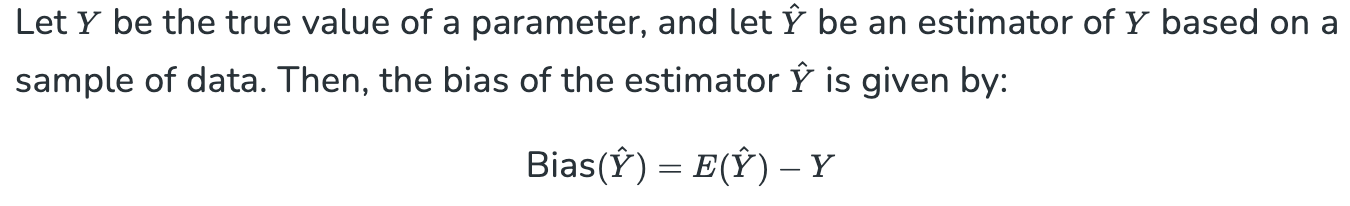

#### Ways to Reduce High Bias in Machine Learning:

* Adopt a More Complex Model:

  - **High bias** often stems from using an overly simplistic model that fails to capture the underlying structure of the data. Switching to a more sophisticated model—such as adding hidden layers in deep neural networks, using polynomial regression for non-linear relationships, CNNs for image tasks, or RNNs for sequential data—can help address this issue.

* Add More Features:

  - Incorporating additional relevant features can enhance the model's expressiveness, allowing it to better detect and learn complex patterns present in the data.

* Decrease Regularization Strength:
  - Regularization techniques like L1 and L2 are used to prevent overfitting. However, when bias is high, these constraints may be too restrictive. Reducing the regularization penalty or disabling it can allow the model to fit the data more closely.

* Expand the Training Dataset:

  - Providing the model with more data can help it learn a broader representation of the problem space, potentially reducing bias by exposing it to more diverse examples.

### Variance

* **Variance,** on the other hand, occurs when a model is too complex and highly sensitive to the fluctuations in the training data. This leads to overfitting, where the model learns noise rather than the actual underlying patterns, resulting in poor generalization to new, unseen data.

* Variance refers to the degree of fluctuation in a model's predictions when it is trained on different subsets of the training data. In machine learning, it represents how sensitive a model is to variations in the training data.

 A model with high variance tends to fit the training data very closely, capturing even minor noise, which can lead to significantly different outcomes when exposed to new or slightly different data. This indicates that the model lacks generalization and is overly tailored to specific training examples.

* Variance is the **measure of spread in data from its mean position.** In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset.


* **High Variance** models **overfit** the training data – they learn noise and perform poorly on unseen data.

  - Examples: Deep decision trees, k-NN with very small k.


  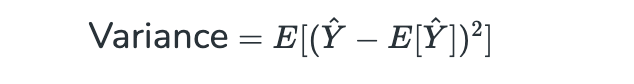

#### Ways to Reduce Variance in Machine Learning:

- **Cross-Validation:** Using techniques like k-fold cross-validation helps assess how well a model generalizes to unseen data. It provides insights into overfitting and can guide hyperparameter tuning to reduce variance.

- **Feature Selection:** Removing irrelevant or redundant features simplifies the model, reducing complexity and thereby lowering variance. Selecting only the most important features ensures the model focuses on meaningful patterns.

- **Regularization:** Applying regularization methods such as L1 (Lasso) or L2 (Ridge) adds a penalty to the model’s complexity. This discourages overfitting and helps control variance.

- **Ensemble Methods:** Techniques like bagging, boosting, and stacking combine predictions from multiple models to reduce overfitting. These methods stabilize predictions and improve generalization by balancing bias and variance.

- **Model Simplification:** Reducing the number of parameters, features, or layers in a model (e.g., a neural network) can decrease sensitivity to training data, helping to lower variance.

- **Early Stopping:** In deep learning, early stopping halts training when the validation performance starts to degrade, preventing the model from learning noise in the data and reducing overfitting.



### Different Combinations of Bias-Variance

| **Bias**      | **Variance**   | **Scenario**                          | **Description**                                                                                                                                       |
|---------------|----------------|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| High Bias     | Low Variance   | Underfitting                          | The model is too simple to capture underlying patterns in the data, leading to systematic errors but stable predictions across different datasets.   |
| Low Bias      | High Variance  | Overfitting                           | The model fits the training data too closely, capturing noise, which results in large differences in predictions with new data.                       |
| High Bias     | High Variance  | Poor Generalization                   | The model neither captures the data patterns well nor performs consistently. It leads to both inaccurate and unstable predictions.                    |
| Low Bias      | Low Variance   | Ideal Model (Rare in Practice)        | The model captures data patterns well and performs consistently across different datasets. This is the desired state but hard to achieve in practice. |



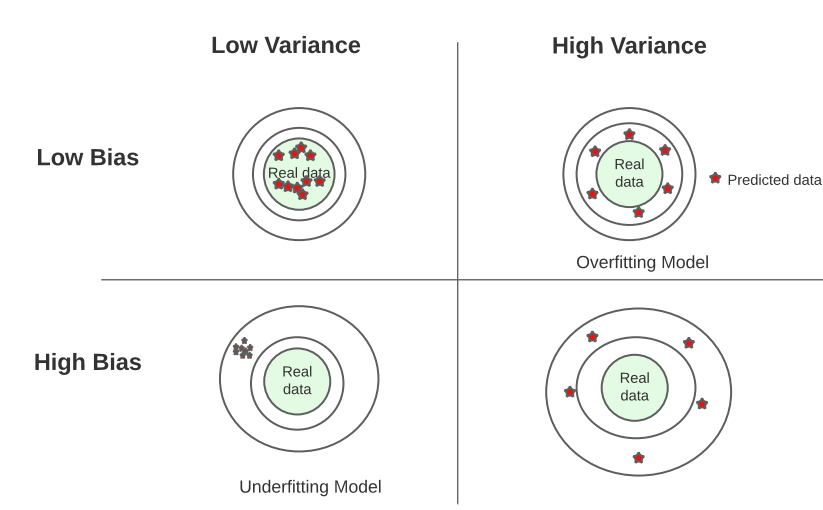

### bias-variance tradeoff

The **bias-variance tradeoff** is a core concept in model optimization. 

  &nbsp; While the ideal scenario is to have **both low bias and low variance**,
  
 in reality, minimizing one often leads to an increase in the other. Striking the right balance between the two is essential for building models that are both accurate and capable of generalizing well to new, unseen data.


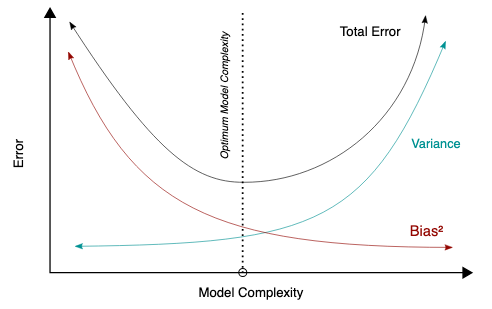

In [3]:
# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=23,
    shuffle=True,
    stratify=y
)

# Initialize the base model
tree = DecisionTreeClassifier(random_state=123)

# Create the BaggingClassifier model
clf = BaggingClassifier(
    base_estimator=tree,
    n_estimators=50,
    random_state=23
)

# Perform bias-variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    clf, X_train, y_train, X_test, y_test,
    loss='0-1_loss',
    random_seed=23
)

# Print the results
print('Average expected loss: %.2f' % avg_expected_loss)
print('Average bias: %.2f' % avg_bias)
print('Average variance: %.2f' % avg_var)

# Simple interpretation
if avg_bias > avg_var:
    print("Interpretation: The model has high bias. Consider using a more complex model.")
elif avg_var > avg_bias:
    print("Interpretation: The model has high variance. Consider regularization or simplifying the model.")
else:
    print("Interpretation: The model has a good balance between bias and variance.")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [4]:
!pip install -q mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
